<a href="https://colab.research.google.com/github/priyanka-ingale/unstructured-intelligence/blob/main/CarsWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the car dataset
df_cars = pd.read_csv('IA1_2.csv')

In [8]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.5 MB/s eta 0:00:00


In [9]:
import gensim
from gensim.models import Word2Vec

In [10]:
# 1. Prepare data: split the description tags into a list of strings [cite: 1, 2]
sentences = [desc.split(',') for desc in df_cars['description'].values]
print(f"Total sentences: {len(sentences)}")
print("Example sentence:", sentences[0])

Total sentences: 11914
Example sentence: ['premium unleaded (required)', 'MANUAL', 'rear wheel drive', 'Factory Tuner', 'Luxury', 'High-Performance', 'Compact', 'Coupe', 'BMW 1 Series M']


In [11]:
# 2. Run the model with vector size = 50
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

In [12]:
# Display the vector for 'Toyota Camry'
camry_vector = model.wv.__getitem__('Toyota Camry')
print("Vector for 'Toyota Camry':\n", camry_vector)

Vector for 'Toyota Camry':
 [-0.03996705  0.04993635  0.01134081 -0.038343   -0.04975412 -0.05150088
  0.0554199   0.17985618 -0.0394237  -0.00687672  0.07477739 -0.06579964
  0.06873101 -0.0098848  -0.04576033  0.00288757  0.08547164  0.08247735
 -0.09848613 -0.16111803  0.03662595 -0.02337482  0.15613559  0.09152379
  0.0772601  -0.02578167  0.00107355  0.10429502 -0.05745218  0.00479351
  0.03822416  0.10393231 -0.02654043 -0.02821045 -0.0166841  -0.03252152
  0.09500214 -0.02895987  0.0507068  -0.01391215  0.0784422  -0.04238558
 -0.05462149  0.06991636  0.1542574  -0.00886186  0.04776369 -0.07458956
  0.04617108  0.00323333]


In [13]:
# 3. Compute similarity between 'Porsche 718 Cayman' and 'Nissan Van'
similarity = model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')
print(f"\nSimilarity between 'Porsche 718 Cayman' and 'Nissan Van': {similarity:.4f}")


Similarity between 'Porsche 718 Cayman' and 'Nissan Van': 0.7429


In [14]:
# 4. Find the five cars most similar to 'Mercedes-Benz SLK-Class'
similar_cars = model.wv.most_similar('Mercedes-Benz SLK-Class', topn=5)
for car, score in similar_cars:
    print(f"- {car}: {score:.4f}")


- Nissan 350Z: 0.9563
- Ferrari F430: 0.9526
- Chevrolet Camaro: 0.9525
- Audi R8: 0.9520
- Lamborghini Murcielago: 0.9508


In [15]:
from sklearn.manifold import TSNE

In [24]:
# 5. Generate a t-SNE graph for 50 unique cars
unique_cars = df_cars['Maker_Model'].unique()[:50]
X = model.wv.__getitem__(unique_cars)

# Perform t-SNE reduction
tsne_model = TSNE(perplexity=4, n_components=2, init="pca", n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [25]:
import matplotlib.pyplot as plt

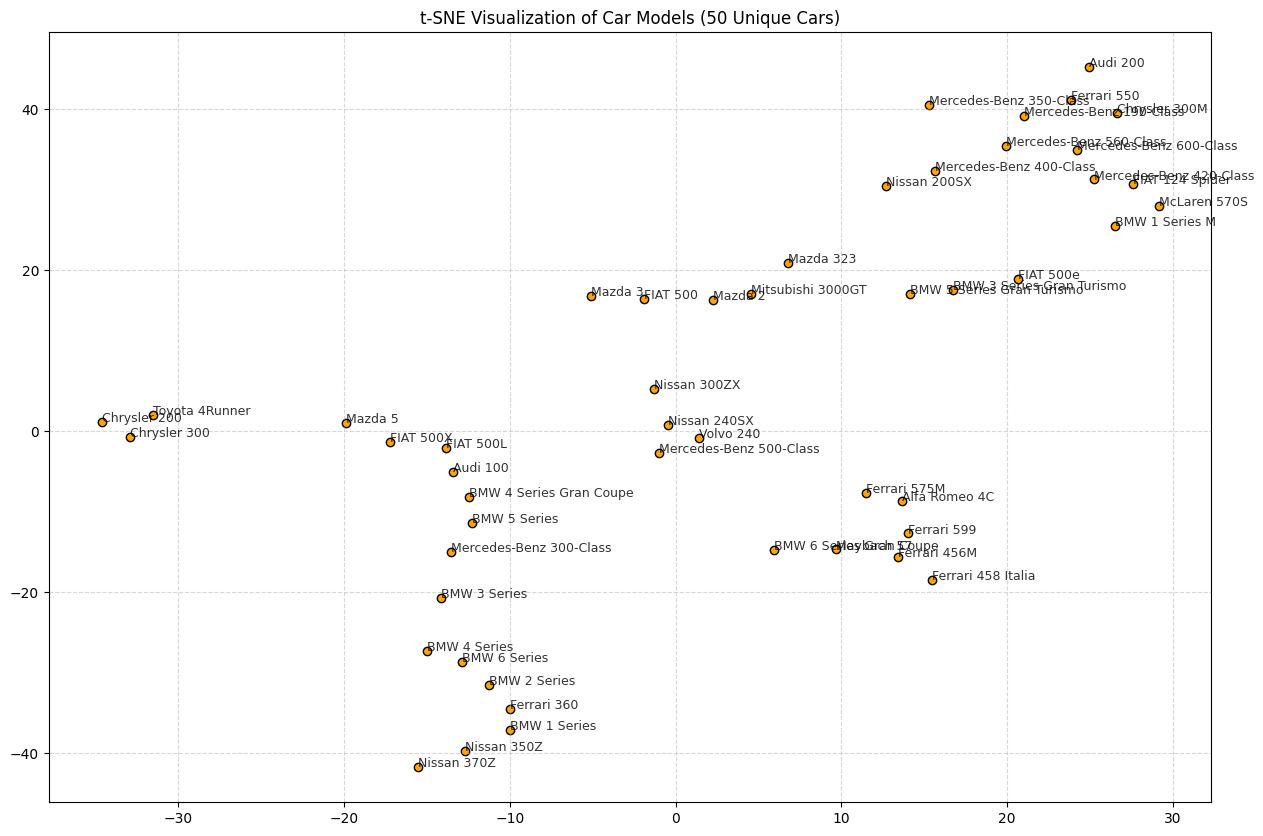

In [27]:

# Plotting the t-SNE results
plt.figure(figsize=(15, 10))
plt.scatter(Y[:, 0], Y[:, 1], c='orange', edgecolors='k')

# Annotate the points with car names
for i, car in enumerate(unique_cars):
    plt.annotate(car, (Y[i, 0], Y[i, 1]), fontsize=9, alpha=0.8)

plt.title('t-SNE Visualization of Car Models (50 Unique Cars)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()